In [118]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json


In [119]:
import json
dic = {'lower_limit' :-500,
        'upper_limit' :500,
        'fit' : "schwefel" ,
        'pop_size' : 200,
        'parent_selections' : "on",
        'mutate' : "non adaptive",
        'recombination' : "on",
        'dimensionality':3,
        'survival_selection' : "elitist",
        'num_of_run' : 6,
        'generations':200
}
with open('./config.json', 'w') as f:
    json.dump(dic, f)

In [120]:
# dic = {'lower_limit' :-32,
#         'upper_limit' :32,
#         'fit' : "ackley" ,
#         'pop_size' : 200,
#         'parent_selections' : "on",
#         'mutate' : "adaptive",
#         'recombination' : "on",
#         'dimensionality': 5,
#         'survival_selection' : "elitist",
#         'num_of_run' : 2,
#         'generations':300
# }

#con = json.loads(open('config.json').read())
lower_limit =dic['lower_limit']
upper_limit =dic['upper_limit']
fit = dic['fit']
pop_size = dic['pop_size']
parent_selections = dic['parent_selections']
mutate = dic['mutate']
recombination = dic['recombination']
dimensionality= dic['dimensionality']
survival_selection = dic['survival_selection']
num_of_run = dic['num_of_run']
generations=dic['generations']

In [121]:

def initialize_population(lower_limit, upper_limit, pop_size, dimensions):
    #this is array for population
    pop = []
    for _ in range(pop_size):
        individual = [np.random.uniform(lower_limit, upper_limit, size=dimensions), np.random.uniform(upper_limit)]
        pop.append(individual)
    return np.array(pop, dtype=object)
pop = initialize_population(lower_limit, upper_limit, pop_size, dimensionality)
#print(pop)

In [122]:
import numpy as np

def schwefel(a):
    alpha = 419.0171
    n = len(a)
    sin_term = np.sin(np.sqrt(np.abs(a)))
    result = alpha * n - np.sum(a * sin_term)
    return result

def ackley(a):
    # a = 20
    # b = 0.2
    # c = 2 * np.pi
    # a = np.asarray(a)
    n = len(a)
    sum_sq_terms = np.sum(a ** 2)
    cos_terms = np.cos(2 * np.pi * a)
    result = -20 * np.exp(-0.2 * np.sqrt(sum_sq_terms / n)) - np.exp(np.sum(cos_terms) / n) + 20 + np.exp(1)
    return result


In [123]:
import numpy as np

def fitness_for_schwefel(population):
    fitness_values = []
    for individual in population:
        x = individual[0]
        fitness = schwefel(x)
        fitness_values.append(fitness)
    return fitness_values

def fitness_for_ackley(population):
    fitness_values = []
    for individual in population:
        x = individual[0]
        fitness = ackley(x)
        fitness_values.append(fitness)
    return fitness_values




In [124]:
import random


def parent_selection(population, num_parents):
    selected_parents = np.random.choice(len(population), size=num_parents, replace=False)
    return population[selected_parents]

In [125]:
import numpy as np

def local_intermediary(parents):
    chromosome_size = len(parents[0])
    child = np.sum(parents, axis=0) / len(parents)
    return child





In [126]:
import numpy as np
#adabtive

# def mutation(child,  dim=2, low=-500, high=500):
#     x, sigma = child
#     tau = 1 / np.sqrt(2 * dim)
#     tau_prime = 1 / np.sqrt(2 * np.sqrt(dim))
#     term1 = np.random.normal(0, tau)
#     term2 = np.random.normal(0, tau_prime)
#     term3 = term1 + term2
#     sigma_star = sigma * np.exp(term3)
#     mutated_x = x + np.random.normal(0, sigma_star)
#     return np.array([mutated_x, sigma_star], dtype=object)


def mutation(child, dim=2, low=-500, high=500):
    x, sigma = child
    t = 1 / np.sqrt(2 * dim)
    tau_prime = 1 / np.sqrt(2 * np.sqrt(dim))
    sigma_star = sigma * np.exp(np.random.normal(0, t) + np.random.normal(0, tau_prime))
    mutated = x + np.random.normal(0, sigma_star)
    mutated[mutated > high] = 2 * high - mutated[mutated > high]  # Optional: Clip the mutated_x within the range [low, high]
    mutated[mutated < low] = 2 * low - mutated[mutated < low]
    mutated[mutated > high] = high
    mutated[mutated < low] = low
    return np.array([mutated, sigma], dtype=object)


#non_adaptive
# def non_adaptive_mutation(child, fixed_sigma=0.1, dim=2, low=-500, high=500):
#     x, sigma = child
#     sigma_star = fixed_sigma
#     mutated_x = x + np.random.normal(0, np.abs(sigma_star))
#     mutated_x = np.clip(mutated_x, low, high)
#     return np.array([mutated_x, sigma_star], dtype=object)



def non_adaptive_mutation(child, fixed_sigma=0.1, dim=2, low=-500, high=500):
    x, sigma = child
    mutated_x = x + np.random.normal(0, np.abs(fixed_sigma))
    mutated_x = np.clip(mutated_x, low, high)
    return np.array([mutated_x, sigma], dtype=object)

In [127]:
#U,Y
# def generational_selection(children, survivors=100):
#     if fit == "schwefel" :
#         fitness_values = fitness_for_schwefel(children)
#     elif fit == "ackley":
#         fitness_values = fitness_for_ackley(children)
#     else:
#         print("Please Enter Correct Value")

#     best_indices = np.argsort(fitness_values)[:survivors]
#     new_population = children[best_indices]
#     return np.array(new_population)

#U,Y
def generational_selection(children, survivors=100, fit=""):
    if fit == "schwefel":
        fitness_values = fitness_for_schwefel(children)
    elif fit == "ackley":
        fitness_values = fitness_for_ackley(children)
    else:
        print("Please Enter Correct Value")
        return None

    best_indices = np.argsort(fitness_values)[:survivors]
    new_population = children[best_indices]
    return new_population



#U+Y
# def elitist_selection(population, children, survivors=100):

#     combined_population = np.vstack([population, children])

#     if fit == "schwefel" :
#         fitness_values = fitness_for_schwefel(combined_population)
#     elif fit == "ackley":
#         fitness_values = fitness_for_ackley(combined_population)
#     else:
#         print("Please Enter Correct Value")

#     best_indices = np.argsort(fitness_values)[:survivors]
#     new_population = combined_population[best_indices]
#     return np.array(new_population)


def elitist_selection(population, children, survivors=100):
    global fit
    combined_population = np.vstack([population, children])

    if fit == "schwefel":
        fitness_values = fitness_for_schwefel(combined_population)
    elif fit == "ackley":
        fitness_values = fitness_for_ackley(combined_population)
    else:
        print("Please Enter Correct Value")
        return None

    best_indices = np.argsort(fitness_values)[:survivors]
    new_population = combined_population[best_indices]
    return new_population

In [128]:


# population = initialize_population(lower_limit, upper_limit, pop_size, dimensionality)

# def offsprings(population):
    
#     children = []

#     for i in range(len(population) * 7):
        
#         if parent_selections == "on":
#             parents = parent_selection(population, 2)
#         else:
#             parents = population
        
#         if recombination == "on":
#             child = local_intermediary(parents)
#         else:
#             child = parents
        
#         if mutate == "adaptive":
#             child = mutation(child)
#         elif mutate == "non adaptive":
#             child = non_adaptive_mutation(child)
#         elif mutate == "off":
#             continue
   
#         children.append(child)
        
#     return np.array(children)









def offsprings(population, parent_selections="on", recombination="on", mutate="adaptive"):
    children = []

    for i in range(len(population) * 7):
        if parent_selections == "on":
            parents = parent_selection(population, 2)
        else:
            parents = population

        if recombination == "on":
            child = local_intermediary(parents)
        else:
            child = parents

        if mutate == "adaptive":
            child = mutation(child)
        elif mutate == "non adaptive":
            child = non_adaptive_mutation(child)
        elif mutate == "off":
            continue

        children.append(child)

    return np.array(children)

In [129]:
def plot_schwefel():
    x_range = np.linspace(-500, 500, 100)
    y_range = np.linspace(-500, 500, 100)
    X, Y = np.meshgrid(x_range, y_range)
    Z = np.zeros_like(X)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = schwefel([X[i, j], Y[i, j]])

    global_optimum = np.array([420.9687, 420.9687])
    optimum_value = schwefel(global_optimum)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")

    surf = ax.plot_surface(X, Y, Z, cmap="plasma", edgecolor="none", alpha=0.8)
    ax.scatter(
        global_optimum[0],
        global_optimum[1],
        optimum_value,
        color="#FF5733",
        marker="*",
        s=200,
        label="Global Optimum",
    )
    current_optimum = pop[np.argmin(fitness_for_schwefel(pop))][0]
    ax.scatter(
        current_optimum[0],
        current_optimum[1],
        schwefel(current_optimum),
        color="#33FF57",
        marker="o",
        s=150,
        label="Current Optimum",
    )
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Function Value")
    ax.set_title("Schwefel Function with Global and Current Optima")

    ax.legend()
    plt.show()


    
#=============================================
    


def plot_ackley():
    x_range = np.linspace(-5, 5, 100)
    y_range = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x_range, y_range)
    Z = np.zeros_like(X)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = ackley([X[i, j], Y[i, j]])

    global_optimum = np.array([0, 0])
    optimum_value = ackley(global_optimum)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")

    surf = ax.plot_surface(X, Y, Z, cmap="plasma", edgecolor="none", alpha=0.8)

    ax.scatter(global_optimum[0], global_optimum[1], optimum_value, color="#FF5733", marker="*", s=200, label="Global Optimum")

    current_optimum = pop[np.argmin(fitness_for_schwefel(pop))][0]
    ax.scatter(current_optimum[0], current_optimum[1], ackley(current_optimum), color="#33FF57", marker="o", s=150, label="Current Optimum")

    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Function Value")
    ax.set_title("Ackley Function with Global and Current Optima")

    ax.legend()
    plt.show()

#==============================================

def plot_fitness(max_fit, avg_fit):
    sns.set(style="whitegrid")  # استفاده از استایل whitegrid
    fig, axs = plt.subplots(figsize=(10, 5))

    # رسم خطوط با استفاده از seaborn
    sns.lineplot(x=range(len(max_fit)), y=max_fit, label='Max Fitness', color='blue')
    sns.lineplot(x=range(len(avg_fit)), y=avg_fit, label='Average Fitness', color='orange')

    axs.set_xlabel('Generation')
    axs.set_ylabel('Fitness')
    axs.legend()
    axs.set_title('Max and Average Fitness over Generations')

    plt.show()

min fit : 0.12145701305507828 , Generation 200 - Best Fitness: 0.12145701305507828, Average Fitness: 0.11147484620052638


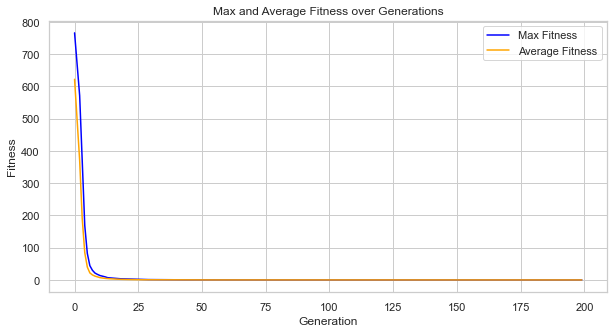

min fit : 0.11643759707521895 , Generation 200 - Best Fitness: 0.11643759707521895, Average Fitness: 0.1090117553195455


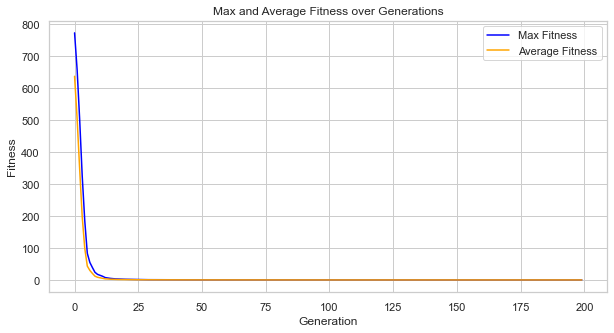

min fit : 0.11919899950044055 , Generation 200 - Best Fitness: 0.11919899950044055, Average Fitness: 0.11024343128835198


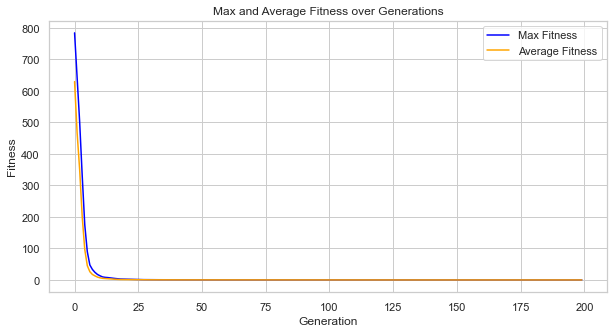

min fit : 0.11746020641635369 , Generation 200 - Best Fitness: 0.11746020641635369, Average Fitness: 0.10964251776594892


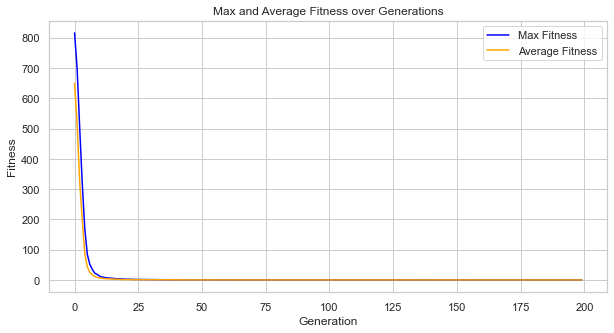

min fit : 0.11676988397766763 , Generation 200 - Best Fitness: 0.11676988397766763, Average Fitness: 0.10908293096027818


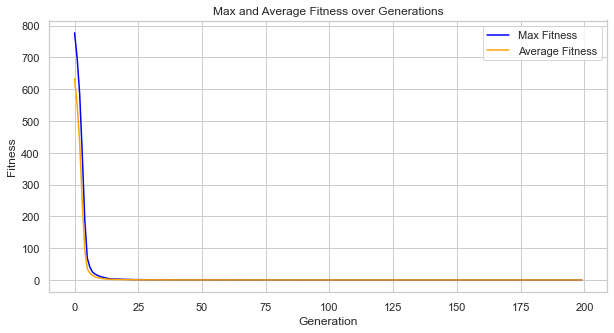

min fit : 0.11637626169886062 , Generation 200 - Best Fitness: 0.11637626169886062, Average Fitness: 0.10931448432125535


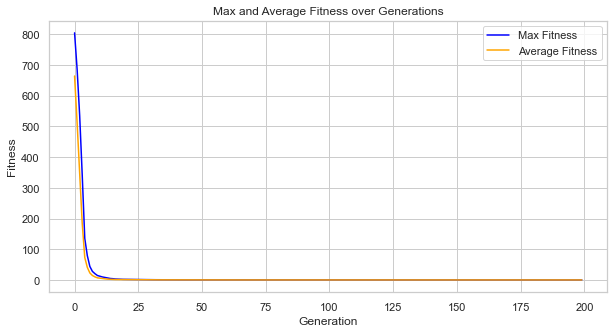

min fit : 0.11969748286924187 , Generation 200 - Best Fitness: 0.11969748286924187, Average Fitness: 0.11013478421373975


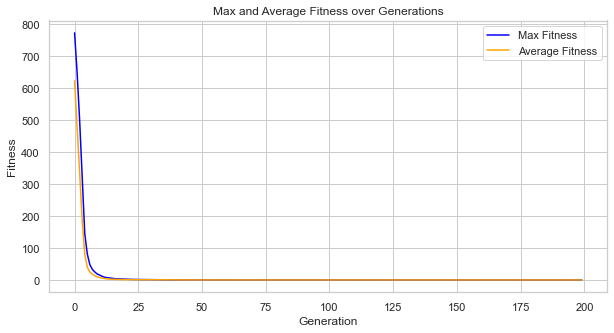

min fit : 0.11571548791289388 , Generation 200 - Best Fitness: 0.11571548791289388, Average Fitness: 0.10899034992186216


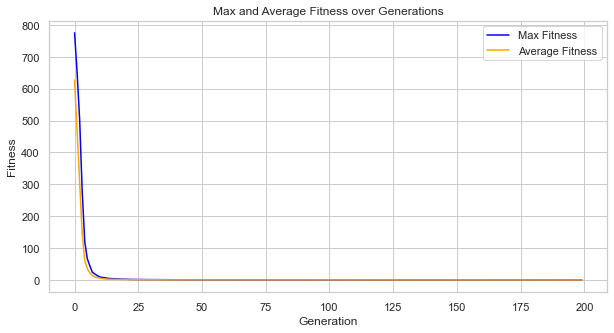

min fit : 0.1127592046227619 , Generation 200 - Best Fitness: 0.1127592046227619, Average Fitness: 0.10822449584654123


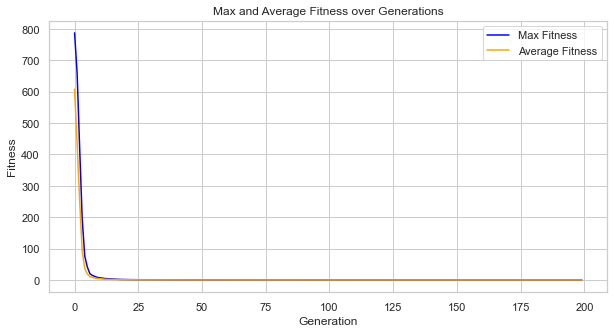

min fit : 0.11479006813328851 , Generation 200 - Best Fitness: 0.11479006813328851, Average Fitness: 0.10841415219187411


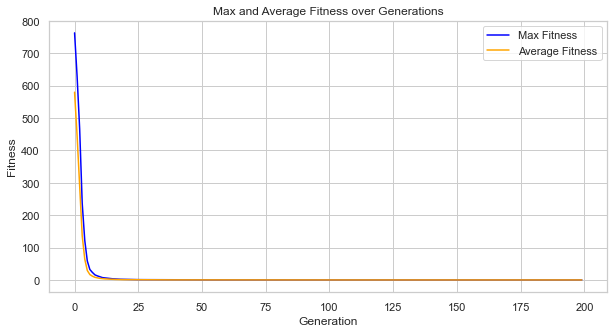

-------------
max fit average for 6 runs: 0.11706622052618058
avg fit average for 6 runs: 0.10945337480299236
-------------


In [130]:
def es():
    population = initialize_population(lower_limit, upper_limit, pop_size, dimensionality)

    if fit == "schwefel":
        first_fitness = fitness_for_schwefel(population)
    elif fit == "ackley":
        first_fitness = fitness_for_ackley(population)
    else:
        print("Please Enter Correct Value")

    max_fit = []
    avg_fit = []

    for generation in range(generations):
        children = offsprings(population)

        if survival_selection == "generational":
            population = generational_selection(children)
        elif survival_selection == "elitist":
            population = elitist_selection(population, children, survivors=100)
        else:
            print("Please Enter Survival Selection Method !")

        if fit == "schwefel":
            fitness_values = fitness_for_schwefel(population)
        elif fit == "ackley":
            fitness_values = fitness_for_ackley(population)
        else:
            print("Please Enter Correct Value")

        max_fit.append(np.max(fitness_values))
        avg_fit.append(np.mean(fitness_values))

        #print(min(fitness_values))
        

        if np.min(fitness_values) <= 1.e-4:
            sol = np.argmin(fitness_values)
            print(population[sol])
            break


    print(f"min fit : {np.min(max_fit)} , Generation {generation + 1} - Best Fitness: {max_fit[-1]}, Average Fitness: {avg_fit[-1]}")

    plot_fitness(max_fit, avg_fit)

    # if fit == "ackley":
    #     plot_ackley()
    # elif fit == "schwefel":
    #     plot_schwefel()

    return max_fit[-1], avg_fit[-1]

max_fit = []
avg_fit = []
for i in range(10):
    max_fit_es, avg_fit_es = es()
    max_fit.append(max_fit_es)
    avg_fit.append(avg_fit_es)

if num_of_run > 1:
    print("-------------")
    print(f"max fit average for {num_of_run} runs: {np.mean(max_fit)}")
    print(f"avg fit average for {num_of_run} runs: {np.mean(avg_fit)}")
    print("-------------")